# Logistic Regression - Titanic Dataset

Titanic dataset is one of the datasets available in sklearn.
You are given:
1. A Training dataset csv file with X train and Y train data
2. A X test File and you have to predict and submit predictions for this file.

Your task is to:
1. Use Logistic Regression and come with predictions.

Read Instructions carefully -
1. Use Logistic Regression as a training algorithm and submit results predicted.
2. Files are in csv format.
3. Submit a csv file (ink in jupyter noteook) with only predictions for X test data. File should not have any headers and
should only have one column i.e. predictions.
4. Your score is based on number of accurate predictions.
Dataset: https://drive.google.com/drive/folders/10KVSJM5FG0ngI718xfJc8ORBk25FznZW?usp=sharing

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
train = pd.read_csv('/content/x_y_train (1).csv')

In [100]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [101]:
train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

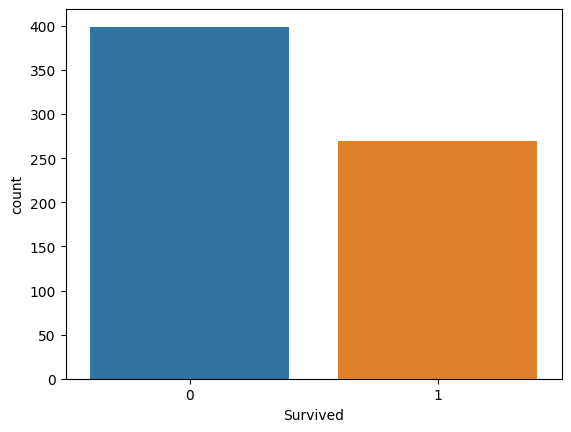

In [102]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

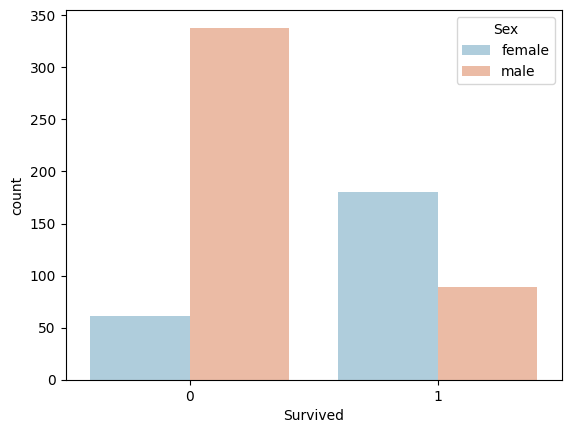

In [103]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

Clearly there's a trend here. It looks like people that did not survive were much more likely to be men. While those who survived were twice as likely to be female.

<Axes: xlabel='Survived', ylabel='count'>

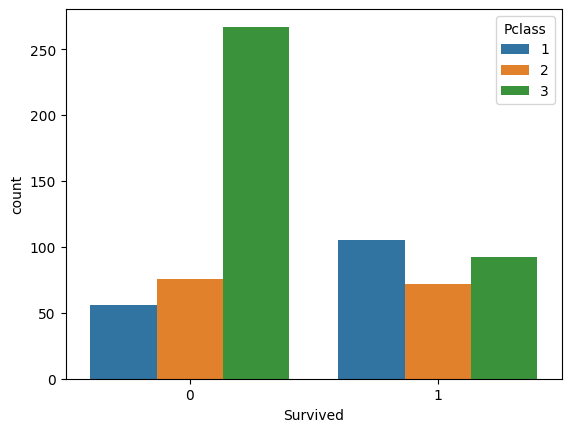

In [104]:
sns.countplot(x='Survived',data=train,hue='Pclass')

Also it looks like the people who did not survive were overwhelmingly part of 3rd class. People that did survive were from the higher classes.

<ipython-input-105-508a627bdc4f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),bins=30,kde=False)


<Axes: xlabel='Age'>

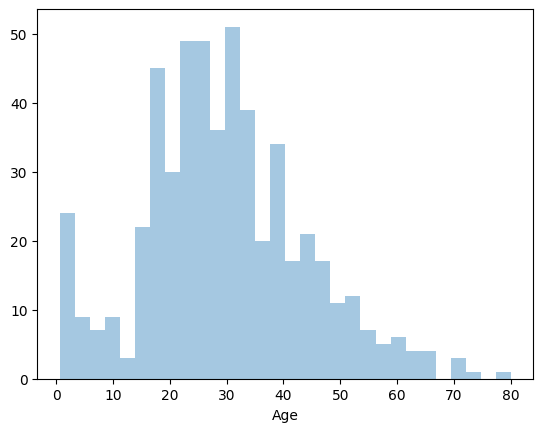

In [105]:
sns.distplot(train['Age'].dropna(),bins=30,kde=False)

There seems to be an interesting bi-modal distribution where there are quite a few young passengers between age 0 and 10. Then the average age tends to be around 20-30.

<Axes: xlabel='SibSp', ylabel='count'>

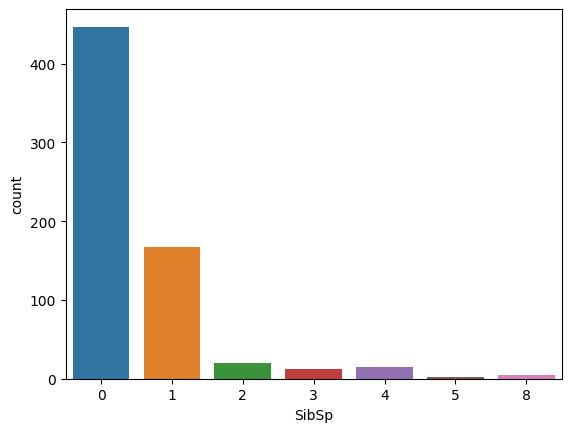

In [106]:
sns.countplot(x='SibSp',data=train)

<Axes: >

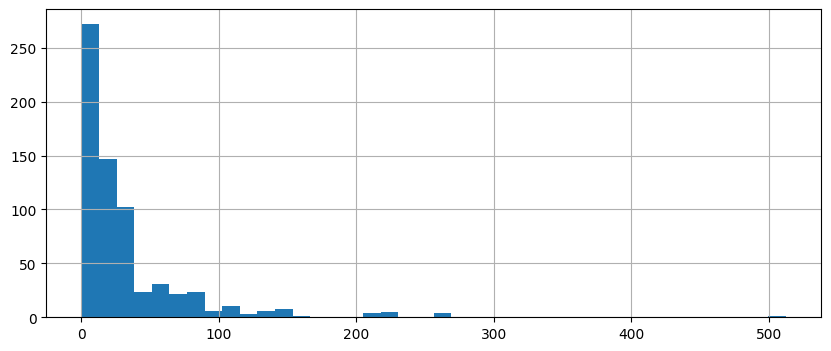

In [107]:
train['Fare'].hist(bins=40,figsize=(10,4))

As we saw earlier there are few columns that are missing some data. We need to clean our dataset before we begin to train our logistic regression model. Lets first try and fill in the missing age values. I'm going to do this by filling in the missing age with the mean age of the passenger class that the passenger belongs to.

<Axes: xlabel='Pclass', ylabel='Age'>

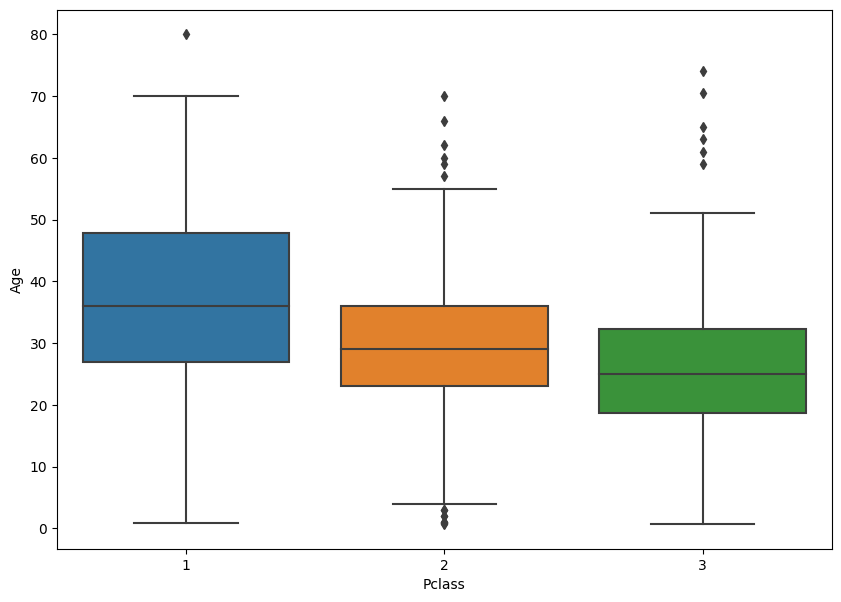

In [108]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [109]:
train.groupby('Pclass').mean()['Age'].round()

<ipython-input-109-ebc6d998b693>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('Pclass').mean()['Age'].round()


Pclass
1    37.0
2    30.0
3    26.0
Name: Age, dtype: float64

In [110]:
mean_class1 = train.groupby('Pclass').mean()['Age'].round().loc[1]
mean_class2 = train.groupby('Pclass').mean()['Age'].round().loc[2]
mean_class3 = train.groupby('Pclass').mean()['Age'].round().loc[3]

<ipython-input-110-72eeb1675e1e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_class1 = train.groupby('Pclass').mean()['Age'].round().loc[1]
<ipython-input-110-72eeb1675e1e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_class2 = train.groupby('Pclass').mean()['Age'].round().loc[2]
<ipython-input-110-72eeb1675e1e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_class3 = train.groupby('Pclass').mea

In [111]:
train.loc[train['Pclass']==1,'Age'] = train.loc[train['Pclass']==1,'Age'].fillna(value=mean_class1)
train.loc[train['Pclass']==2,'Age'] = train.loc[train['Pclass']==2,'Age'].fillna(value=mean_class2)
train.loc[train['Pclass']==3,'Age'] = train.loc[train['Pclass']==3,'Age'].fillna(value=mean_class3)

<Axes: >

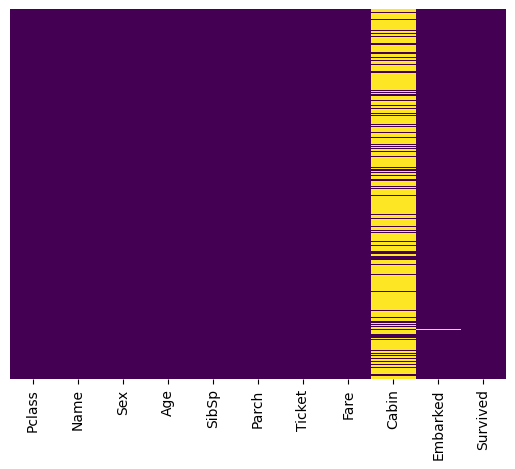

In [112]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [113]:
train.drop('Cabin',axis=1,inplace=True)

In [114]:
train.dropna(inplace=True)

In [115]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [116]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [117]:
train = pd.concat([train,sex,embark],axis=1)

In [118]:
train.head(2)



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male,Q,S
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.00,S,1,0,0,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,26.0,0,0,A/5 2466,8.05,S,0,1,0,1


In [119]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [120]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,2,29.0,1,0,26.000,1,0,0,1
1,3,26.0,0,0,8.050,0,1,0,1
2,2,39.0,0,0,26.000,0,1,0,1
3,3,29.0,0,4,21.075,0,0,0,1
4,3,25.0,0,0,7.050,0,1,0,1


In [121]:
test = pd.read_csv('/content/x_test (1).csv')

In [122]:
test.loc[test['Pclass']==1,'Age'] = test.loc[test['Pclass']==1,'Age'].fillna(value=mean_class1)
test.loc[test['Pclass']==2,'Age'] = test.loc[test['Pclass']==2,'Age'].fillna(value=mean_class2)
test.loc[test['Pclass']==3,'Age'] = test.loc[test['Pclass']==3,'Age'].fillna(value = mean_class3)

<Axes: >

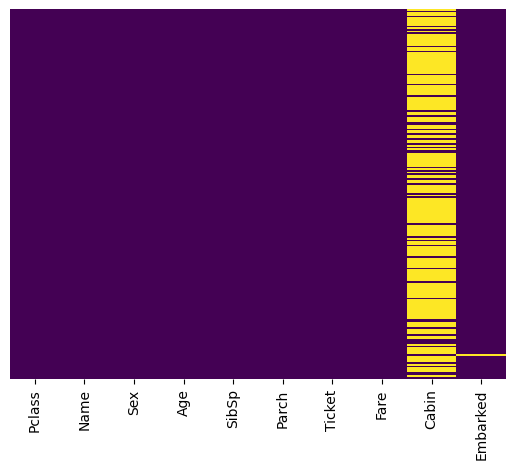

In [123]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [124]:
test.drop('Cabin',axis=1,inplace=True)

In [125]:
test.dropna(inplace=True)

In [126]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [127]:
test = pd.concat([test,sex,embark],axis=1)

In [128]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [129]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,2,8.0,1,1,36.7500,1,0,1
1,1,49.0,0,0,25.9292,0,0,1
2,3,26.0,0,0,7.7375,1,1,0
3,2,24.0,2,1,27.0000,0,0,1
4,1,36.0,0,0,26.2875,1,0,1


# Train and build Classifier

In [130]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [132]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
logmodel.score(X_train,y_train)

0.8068669527896996

In [134]:
logmodel.score(X_test,y_test)

0.8109452736318408

# Making Predictions

In [135]:
predictions = logmodel.predict(test)

In [140]:
predictions_df = pd.DataFrame({'Fare': test['Fare'] , 'Predicted': predictions})

predictions_df.to_csv('predictions.csv', index=False)

In [141]:
import pandas as pd

# Load your 'test' and 'predictions' CSV files
test_data = pd.read_csv('/content/x_test (1).csv')
predictions_data = pd.read_csv('/content/predictions.csv')

# Assuming you have a common identifier (e.g., an index or a unique key) in both files to match the rows
# You can merge the two dataframes based on this common identifier
merged_data = pd.merge(test_data, predictions_data, on=['Fare'])

# Save the merged data to a new CSV file
merged_data.to_csv('merged_test_and_predictions.csv', index=False)
